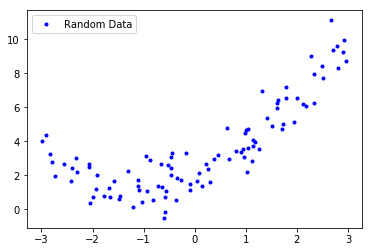

In [15]:
# (p. 121) Polynomial regression
# Generate non-linear test data:
import numpy as np

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(X, y, "b.", label="Random Data")
plt.legend(loc="upper left")
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([ 1.79627174]), array([ 1.79627174,  3.22659216]))

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 2.06395209]), array([[ 1.1776347 ,  0.51892109]]))

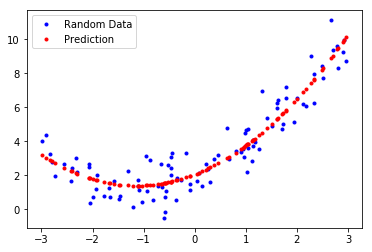

In [23]:
y_pred = X_poly.dot(lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X, y, "b.", label="Random Data")
plt.plot(X, y_pred, "r.", label="Prediction")
plt.legend(loc="upper left")
plt.show()

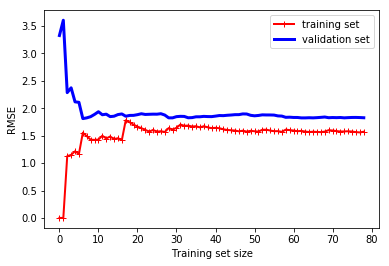

In [27]:
# (p. 124) learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend(loc="upper right")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)